In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.shape

(7032, 21)

In [12]:
df.duplicated().sum()

0

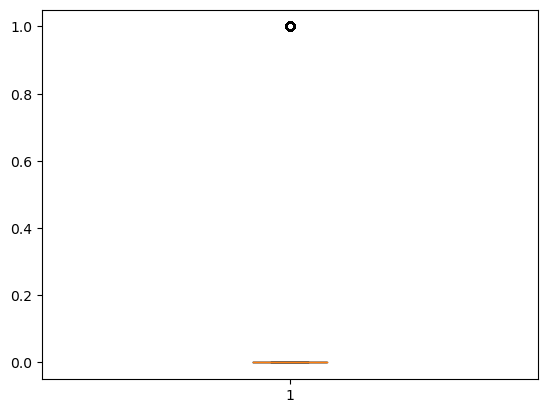

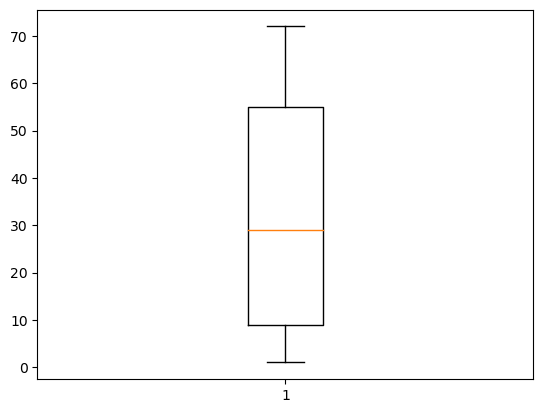

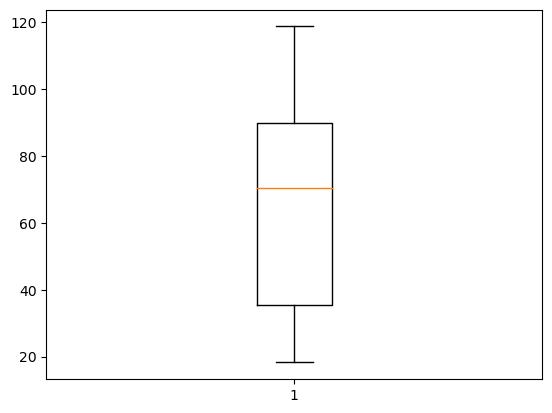

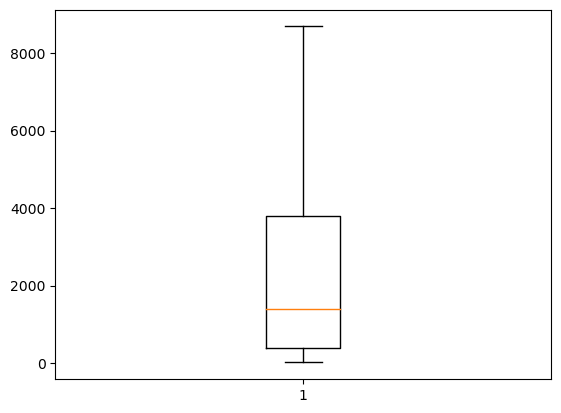

In [13]:
for i in df.columns:
    if (df[i].dtypes=='int64')|(df[i].dtypes=='float64'):
        plt.boxplot(df[i])
        plt.xlabel=('i')
        plt.ylabel=('count')
        plt.show()

**1. Extract 5th column and store it in 'customer-5'**

In [14]:
customer_5 = df.iloc[:, 4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

**2. Extract 15th column and store it in 'customer-15'**

In [15]:
customer_15 = df.iloc[:, 14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7032, dtype: object

**3. Extract all the male senior citizens whose payment method is electronic check 
and store the result in ‘senior_male_electronic’**

In [16]:
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


**4. Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’**

In [17]:
customer_total_tenure = df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


**5. Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’**

In [18]:
two_mail_yes = df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


**6. Extract 333 random records from the customer_churn dataframe and store
the result in ‘customer_333’**

In [19]:
customer_333 = df.sample(333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1636,1371-OJCEK,Female,0,No,No,48,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.35,1133.70,No
1899,8563-OYMQY,Male,0,No,No,17,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.95,1612.20,No
3364,5519-YLDGW,Female,0,Yes,No,21,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.90,2254.20,Yes
1296,6729-GDNGC,Female,1,No,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),80.70,1614.20,No
3261,2378-YIZKA,Female,0,Yes,Yes,68,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.00,5607.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,1472-TNCWL,Male,0,No,Yes,36,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.70,3512.50,No
2092,2251-PYLPB,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),79.55,5810.90,No
5046,7252-NTGSS,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.15,45.15,No
5530,9644-KVCNC,Female,0,No,No,66,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),92.15,6056.90,No


**7. Get the count of different levels from the ‘Churn’ column**

In [20]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

**8. Data Visualization:**

 - ● Build a bar-plot for the ’InternetService’ column:
 - a. Set x-axis label to ‘Categories of Internet Service’
 - b. Set y-axis label to ‘Count of Categories’
 - c. Set the title of plot to be ‘Distribution of Internet Service’
 - d. Set the color of the bars to be ‘orange’

TypeError: 'str' object is not callable

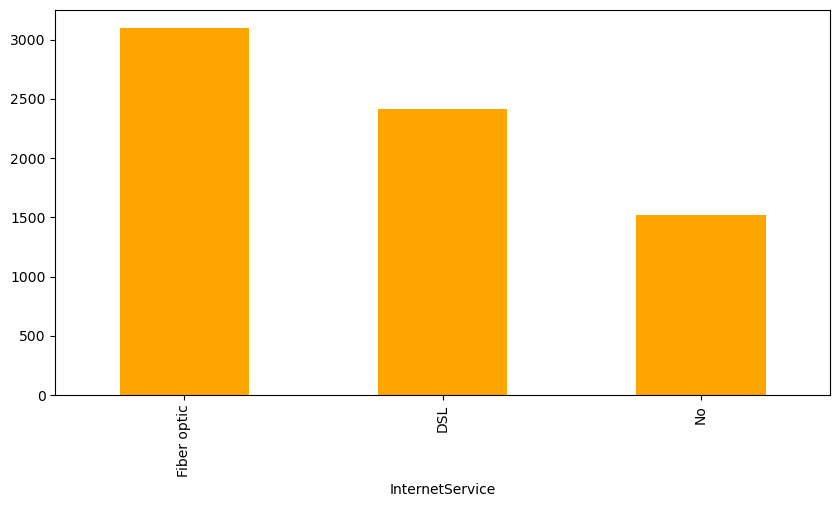

In [21]:
internet_service_counts = df['InternetService'].value_counts()

plt.figure(figsize=(10,5))
internet_service_counts.plot(kind='bar', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

**9. Build a histogram for the ‘tenure’ column:**
- a. Set the number of bins to be 30
- b. Set the color of the bins to be ‘green’
- c. Assign the title ‘Distribution of tenure’

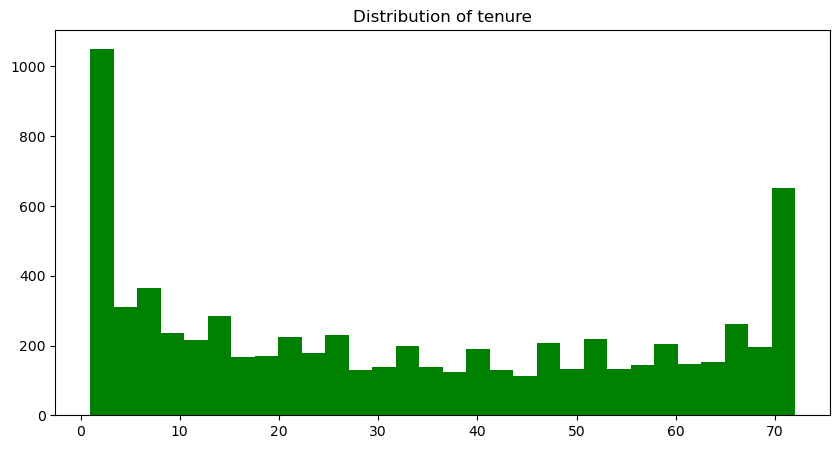

In [22]:
plt.figure(figsize=(10,5))
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

**10.Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure.Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’**

- a. Assign the points a color of ‘brown’
- b. Set the x-axis label to ‘Tenure of customer’
- c. Set the y-axis label to ‘Monthly Charges of customer’
- d. Set the title to ‘Tenure vs Monthly Charges’
- e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
- y-axis &
- f. ‘Contract’ on the x-axis.

TypeError: 'str' object is not callable

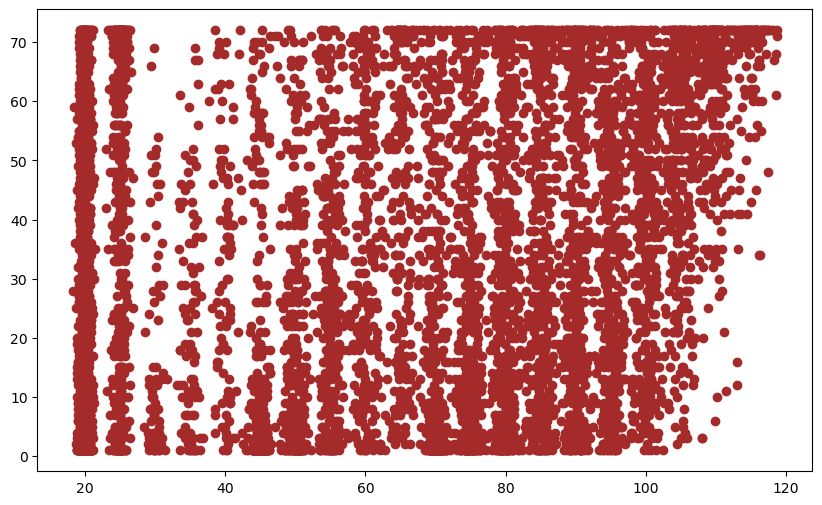

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['MonthlyCharges'], df['tenure'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

TypeError: 'str' object is not callable

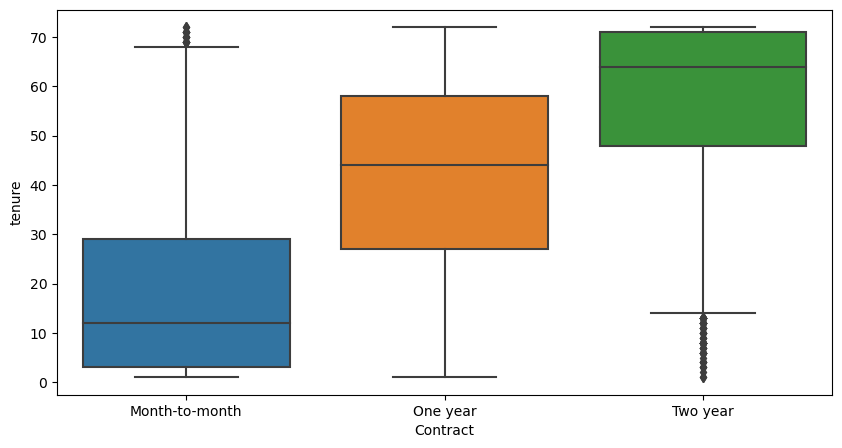

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.show()

**11. Linear Regression:**
    
- ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
    and independent variable is ‘tenure’:
- a. Divide the dataset into train and test sets in 70:30 ratio.
- b. Build the model on train set and predict the values on test set
- c. After predicting the values, find the root mean square error
- d. Find out the error in prediction & store the result in ‘error’
- e. Find the root mean square error

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [26]:
X = df[['tenure']]
y = df[['MonthlyCharges']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [32]:
rmse

29.027041774776432

In [33]:
error = y_test - y_pred
error

,MonthlyCharges
5401,-43.995506
1681,-51.774911
2076,-0.233314
3359,-41.488334
6629,7.325089
...,...
3550,31.453777
6317,23.726009
6306,39.825806
5946,6.146605


**12. Logistic Regression:**
    
- ● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:
- a. Divide the dataset in 65:35 ratio
- b. Build the model on train set and predict the values on test set
- c. Build the confusion matrix and get the accuracy score
- d. Build a multiple logistic regression model where dependent variable
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’
- e. Divide the dataset in 80:20 ratio
- f. Build the model on train set and predict the values on test set
- g. Build the confusion matrix and get the accuracy score

In [34]:
X = df[['MonthlyCharges']]
y= df[['Churn']]

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [37]:
log_reg = LogisticRegression()

In [38]:
log_reg.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
y_pred = log_reg.predict(X_test)

In [40]:
confusion_matrix= confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1551,    0],
       [ 559,    0]], dtype=int64)

In [41]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.7350710900473933

**Multiple Logistic Regression:**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [52]:
X = df[['tenure','MonthlyCharges']]
y= df[['Churn']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [54]:
log_reg = LogisticRegression()

In [55]:
log_reg.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [56]:
y_pred = log_reg.predict(X_test)

In [57]:
confusion_matric= confusion_matrix(y_test, y_pred)
confusion_matric

array([[947,  99],
       [185, 176]], dtype=int64)

In [58]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.7981520966595593

**13.Decision Tree:**
    
- ● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:
- a. Divide the dataset in 80:20 ratio
- b. Build the model on train set and predict the values on test set
- c. Build the confusion matrix and calculate the accuracy

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [62]:
X = df[['tenure']]
y = df[['Churn']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [64]:
dt = DecisionTreeClassifier()

In [65]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dt.predict(X_test)

In [67]:
confusion_matric= confusion_matrix(y_test, y_pred)
confusion_matric

array([[962,  84],
       [263,  98]], dtype=int64)

In [68]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.7533759772565742

**14. Random Forest:**
    
- ● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:
- a. Divide the dataset in 70:30 ratio
- b. Build the model on train set and predict the values on test set
- c. Build the confusion matrix and calculate the accuracy

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [71]:
X = df[['MonthlyCharges']]
y = df[['Churn']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [74]:
rf = RandomForestClassifier()

In [75]:
rf.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [77]:
y_pred = rf.predict(X_test)

In [78]:
confusion_matric= confusion_matrix(y_test, y_pred)
confusion_matric

array([[1287,  264],
       [ 410,  149]], dtype=int64)

In [79]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.680568720379147